<a href="https://colab.research.google.com/github/martuballestrasse/MyFiles/blob/main/Clase%203/Practica%20n3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicios con matrices

In [1]:
import numpy as np

In [2]:
# Crear un vector desde una lista
v = np.array([1, 2, 3, 4])
print(v)

[1 2 3 4]


In [4]:
a = np.array([10, 20, 30])
b = np.array([1, 2, 3])

# Suma elemento a elemento
print(a + b)

# Multiplicación escalar
print(a * 2)

# Potencia
print(b ** 2)

[11 22 33]
[20 40 60]
[1 4 9]


Matrices y álgebra lineal

In [15]:
# Matriz 2x2
A = np.array([[1, 2], [3, 4]])

# Transpuesta
print(A.T)

# Inversa
print(np.linalg.inv(A))

# Producto matricial
B = np.array([[5, 6], [7, 8]])
print(np.dot(A, B))

# Multiplicación de matrices (equivalente a dot)
print(f"Multiplicacion de matrices: \n{A @ B}")

[[1 3]
 [2 4]]
[[-2.   1. ]
 [ 1.5 -0.5]]
[[19 22]
 [43 50]]
Multiplicacion de matrices: 
[[19 22]
 [43 50]]


Pandas: Series y dataframes

In [16]:
import pandas as pd

In [19]:
#Crear Series
s = pd.Series([10, 20, 30], index = ['a','b', 'c'])
print(s)

a    10
b    20
c    30
dtype: int64


In [39]:
# Crear una Serie desde un diccionario
datos_diccionario = {"día1": 420, "día2": 380, "día3": 390}
serie_dict = pd.Series(datos_diccionario)
print("Serie desde diccionario:\n", serie_dict)
print("--------------")
# Selección específica con índice
serie_filtrada = pd.Series(datos_diccionario, index=["día1", "día2"])
print("Serie filtrada:\n", serie_filtrada)

Serie desde diccionario:
 día1    420
día2    380
día3    390
dtype: int64
--------------
Serie filtrada:
 día1    420
día2    380
dtype: int64


In [48]:
#Crear DataFrames
data = {
    'nombre': ['Juan', 'Ana', 'Pedro'],
    'edad': [25, 30, 35],
    'ciudad': ['Niza', 'Buenos Aires', 'Rosario']
}

df = pd.DataFrame(data)
print(df)

  nombre  edad        ciudad
0   Juan    25          Niza
1    Ana    30  Buenos Aires
2  Pedro    35       Rosario


In [36]:
# Seleccionar columna
print(df['edad'])

# Filtrar por condición
print(df[df['edad'] > 30])

# Acceder por etiqueta o posición
print(df.loc[1])   # Fila con índice 1
print(df.iloc[0])  # Primera fila

0    25
1    30
2    35
Name: edad, dtype: int64
  nombre  edad    ciudad
2  Pedro    35  Valencia
nombre          Ana
edad             30
ciudad    Barcelona
Name: 1, dtype: object
nombre      Juan
edad          25
ciudad    Madrid
Name: 0, dtype: object


In [45]:
print("Estadísticas descriptivas:\n", df.describe())
print("Informacion:\n", df.info())

Estadísticas descriptivas:
        edad
count   3.0
mean   30.0
std     5.0
min    25.0
25%    27.5
50%    30.0
75%    32.5
max    35.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nombre  3 non-null      object
 1   edad    3 non-null      int64 
 2   ciudad  3 non-null      object
dtypes: int64(1), object(2)
memory usage: 204.0+ bytes
Informacion:
 None


In [50]:
#Agregar columna
df['pais'] = ["Francia", "Argentina", "Argentina"]
#Agrupar y resumir dato
promedio_edad_por_pais = df.groupby('pais')['edad'].mean()
print(promedio_edad_por_pais)

pais
Argentina    32.5
Francia      25.0
Name: edad, dtype: float64


Ejercicio Práctico

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
#Cargar los datos y setear Fecha como indice
url = 'https://raw.githubusercontent.com/JJTorresDS/stocks-ds-edu/main/stocks.csv'
stocks_df = pd.read_csv(url)
stocks_df['formatted_date'] = pd.to_datetime(stocks_df['formatted_date'])
stocks_df.set_index('formatted_date', inplace=True)
print(stocks_df.head())

                       MCD       SBUX        GOOG        AMZN       MSFT  \
formatted_date                                                             
2016-01-01      106.332146  54.353962  742.950012  587.000000  49.853489   
2016-02-01      100.671043  52.064243  697.770020  552.520020  46.043667   
2016-03-01      108.782211  53.571442  744.950012  593.640015  50.339031   
2016-04-01      109.483307  50.457645  693.010010  659.590027  45.453705   
2016-05-01      105.648926  49.255203  735.719971  722.789978  48.306515   

                      JPM        BAC          C        MAR        HLT  \
formatted_date                                                          
2016-01-01      50.424938  12.573010  36.897804  57.754189  35.192841   
2016-02-01      48.033066  11.132540  33.707108  64.228912  41.061607   
2016-03-01      50.524323  12.021718  36.223217  67.336624  44.499886   
2016-04-01      53.919910  12.995729  40.153545  66.305466  43.716049   
2016-05-01      56.098225  13

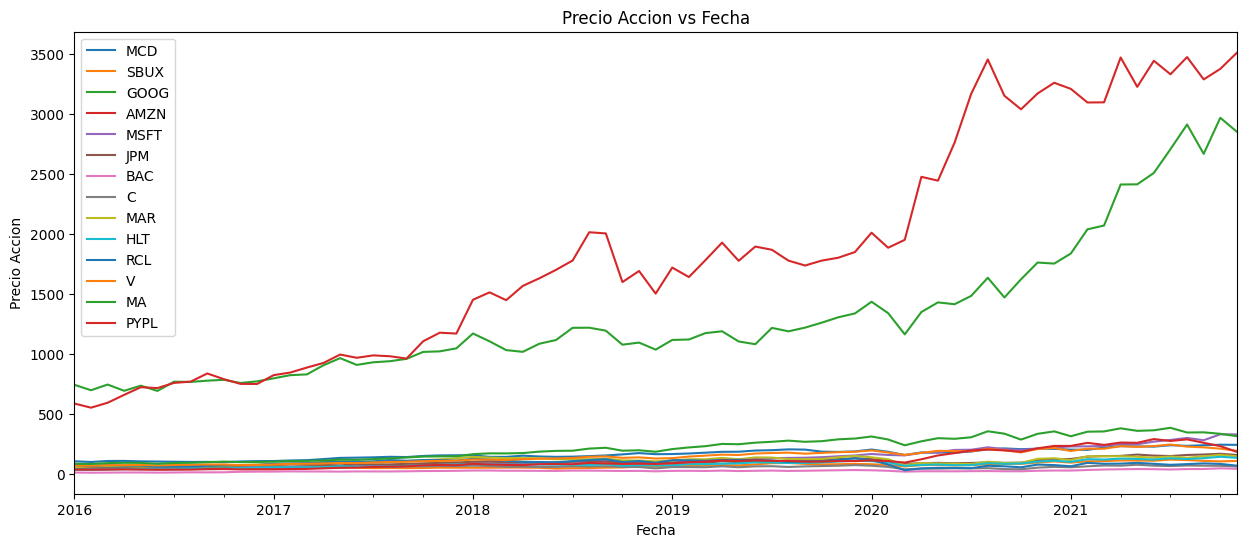

In [83]:
stocks_df.plot(kind='line',figsize=(15,6),xlabel='Fecha', ylabel='Precio Accion', title='Precio Accion vs Fecha').legend(loc='best')

# Task
Calculate the average monthly return for each stock in the `stocks_df` DataFrame.

## Resample data to monthly frequency

### Subtask:
Resample the `stocks_df` to a monthly frequency, taking the last trading day's price for each month.


**Reasoning**:
Resample the stocks_df to a monthly frequency and select the last trading day's price for each month.



In [84]:
monthly_stocks_df = stocks_df.resample('M').last()
print(monthly_stocks_df.head())

                       MCD       SBUX        GOOG        AMZN       MSFT  \
formatted_date                                                             
2016-01-31      106.332146  54.353962  742.950012  587.000000  49.853489   
2016-02-29      100.671043  52.064243  697.770020  552.520020  46.043667   
2016-03-31      108.782211  53.571442  744.950012  593.640015  50.339031   
2016-04-30      109.483307  50.457645  693.010010  659.590027  45.453705   
2016-05-31      105.648926  49.255203  735.719971  722.789978  48.306515   

                      JPM        BAC          C        MAR        HLT  \
formatted_date                                                          
2016-01-31      50.424938  12.573010  36.897804  57.754189  35.192841   
2016-02-29      48.033066  11.132540  33.707108  64.228912  41.061607   
2016-03-31      50.524323  12.021718  36.223217  67.336624  44.499886   
2016-04-30      53.919910  12.995729  40.153545  66.305466  43.716049   
2016-05-31      56.098225  13

/tmp/ipython-input-2818154048.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_stocks_df = stocks_df.resample('M').last()


**Reasoning**:
Calculate the mean of each column in the monthly_returns_df to get the average monthly returns for each stock.



In [85]:
average_monthly_returns = monthly_returns_df.mean()
display(average_monthly_returns.sort_values(ascending=False))

,0
MSFT,0.028786
AMZN,0.028741
PYPL,0.026796
HLT,0.022580
BAC,0.021910
GOOG,0.021375
MA,0.020965
JPM,0.018847
MAR,0.018841
V,0.015932


In [86]:
#Analizar el porcentaje de cambio cada día
df_cambios = stocks_df.pct_change()*100
#Calcular el desvio estandar para analizar volatilidad de cada acción
desvio_estandar_cambios = df_cambios.std()
print("Desvio estándar del porcentaje de cambio para cada acción:")
print(desvio_estandar_cambios.sort_values(ascending=False))

Desvio estándar del porcentaje de cambio para cada acción:
RCL     15.406672
MAR     10.299854
C        9.968635
BAC      8.741902
PYPL     8.213669
HLT      7.943829
AMZN     7.763218
JPM      6.849320
MA       6.685664
GOOG     6.395640
SBUX     6.314269
V        5.752384
MSFT     5.431094
MCD      4.731886
dtype: float64


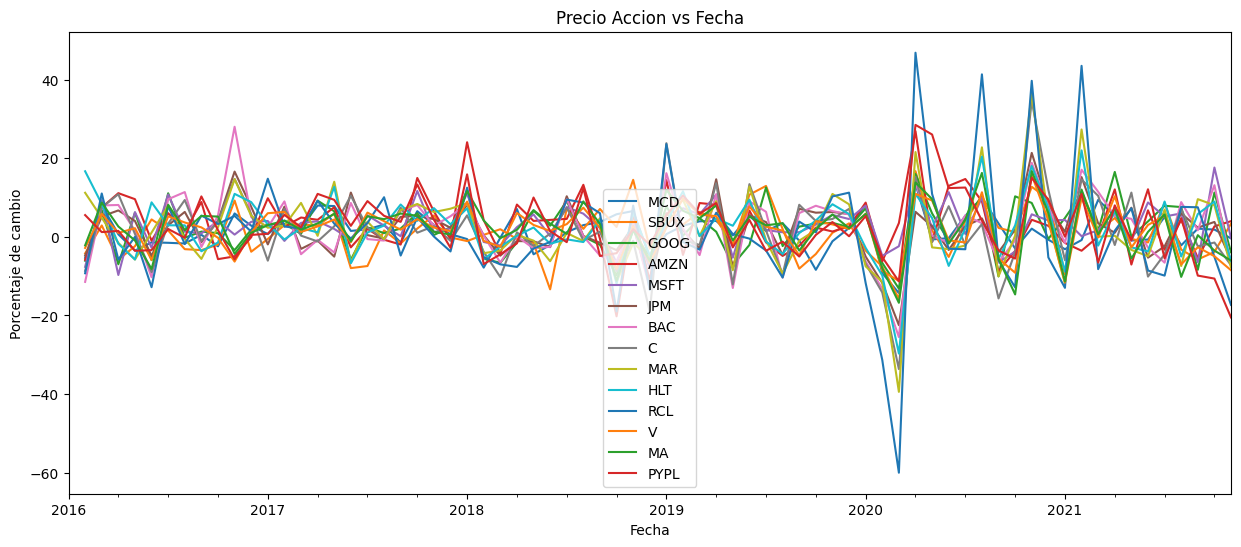

In [87]:
#Identificar mediante gráfico la accion con mayor volatilidad
#df_cambios['RCL'].plot(kind='line',figsize=(15,6),xlabel='Fecha', ylabel='Porcentaje de cambio', title='Precio Accion vs Fecha').legend(loc='best')
df_cambios.plot(kind='line',figsize=(15,6),xlabel='Fecha', ylabel='Porcentaje de cambio', title='Precio Accion vs Fecha').legend(loc='best')

In [97]:
stocks_df2 = stocks_df.copy()
stocks_df2['Fecha']=stocks_df.index
stocks_df2 = stocks_df2.reset_index(drop=True)
stocks_df2.sort_values(by='Fecha', ascending=False).head(11)

,MCD,SBUX,GOOG,AMZN,MSFT,JPM,BAC,C,MAR,HLT,RCL,V,MA,PYPL,Fecha
70,243.251434,109.169281,2849.040039,3507.070068,329.986298,158.830002,44.256985,63.700001,147.559998,135.070007,69.820000,193.429489,314.920013,184.889999,2021-11-01
69,244.196198,105.614609,2965.409912,3372.429932,331.014404,168.872391,47.551128,68.662384,160.020004,143.949997,84.430000,211.397858,335.096588,232.589996,2021-10-01
68,239.780670,109.836403,2665.310059,3285.040039,281.405182,162.709534,42.031269,69.675041,148.089996,132.110001,88.949997,222.358551,347.241272,260.209991,2021-09-01
67,234.863205,116.533272,2909.239990,3470.790039,300.752960,158.991928,41.338173,71.392593,135.139999,124.860001,82.730003,228.386063,345.793121,288.660004,2021-08-01
66,240.055786,120.441193,2704.419922,3327.590088,283.846313,150.006454,37.981613,66.635887,145.979996,131.449997,76.870003,245.622177,384.999420,275.529999,2021-07-01
65,228.463959,110.899529,2506.320068,3440.159912,269.888611,153.722504,40.652176,69.720337,136.520004,120.620003,85.279999,233.091354,364.200226,291.480011,2021-06-01
64,230.061615,112.505035,2411.560059,3223.070068,248.174759,162.320847,41.795921,77.564484,143.580002,125.269997,93.269997,226.263016,359.701233,260.019989,2021-05-01
63,232.215759,113.107674,2410.120117,3467.419922,250.659698,151.122665,39.961987,69.718323,148.520004,128.699997,86.949997,232.494446,380.676941,262.290009,2021-04-01
62,220.471207,107.950691,2068.629883,3094.080078,234.348633,149.570267,37.959236,71.196068,148.110001,120.919998,85.610001,210.764038,354.761078,242.839996,2021-03-01
61,201.525879,106.273232,2036.859985,3092.929932,230.448318,144.598679,34.054409,64.472809,148.070007,123.680000,93.269997,211.093323,352.569092,259.850006,2021-02-01


In [99]:
df_long = pd.melt(stocks_df2, value_vars=stocks_df2.columns,id_vars='Fecha')
df_long

,Fecha,variable,value
0,2016-01-01,MCD,106.332146
1,2016-02-01,MCD,100.671043
2,2016-03-01,MCD,108.782211
3,2016-04-01,MCD,109.483307
4,2016-05-01,MCD,105.648926
...,...,...,...
989,2021-07-01,PYPL,275.529999
990,2021-08-01,PYPL,288.660004
991,2021-09-01,PYPL,260.209991
992,2021-10-01,PYPL,232.589996


In [101]:
top_3_stocks = average_monthly_returns.sort_values(ascending=False).head(3).index.tolist()
print("Las 3 acciones con mejor rendimiento promedio mensual son:", top_3_stocks)

#Filtrar stocks_df2 para incluir solo las 3 mejores acciones y la columna 'Fecha'
stocks_top_3_df = stocks_df2[['Fecha'] + top_3_stocks]
display(stocks_top_3_df.head())

Las 3 acciones con mejor rendimiento promedio mensual son: ['MSFT', 'AMZN', 'PYPL']


,Fecha,MSFT,AMZN,PYPL
0,2016-01-01,49.853489,587.000000,36.139999
1,2016-02-01,46.043667,552.520020,38.139999
2,2016-03-01,50.339031,593.640015,38.599998
3,2016-04-01,45.453705,659.590027,39.180000
4,2016-05-01,48.306515,722.789978,37.790001


In [103]:
#Lo pasamos a long por una cuestion de formato para usar plotly luego
df_long = pd.melt(stocks_top_3_df, value_vars = stocks_top_3_df.columns, id_vars='Fecha')
df_long

,Fecha,variable,value
0,2016-01-01,MSFT,49.853489
1,2016-02-01,MSFT,46.043667
2,2016-03-01,MSFT,50.339031
3,2016-04-01,MSFT,45.453705
4,2016-05-01,MSFT,48.306515
...,...,...,...
208,2021-07-01,PYPL,275.529999
209,2021-08-01,PYPL,288.660004
210,2021-09-01,PYPL,260.209991
211,2021-10-01,PYPL,232.589996


In [104]:
#Crear un gráfico que muestre la evolución de las 3 acciones con mejor rendimiento
import plotly.express as px


fig=px.line(data_frame=df_long,x='Fecha',y='value',line_group='variable',color='variable',title='Comportamiento de precio de acciones',\
             labels={
                     "Fecha": "Fecha_dias",
                     "value": "Precio (USD)"
                 })
fig.update_layout(paper_bgcolor="#FFFFFF",plot_bgcolor='#FFFFFF',)

fig.show()